In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
cd/Users/hp/Desktop/dataset

C:\Users\hp\Desktop\dataset


In [4]:
data=pd.read_csv('original2.csv')

In [5]:
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlin'

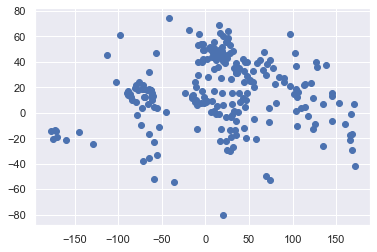

In [15]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlin(-180,180)
plt.ylin(-90,90)
plt.show

In [9]:
x=data.iloc[:,1:3]

In [10]:
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [45]:
kmeans=KMeans(4)

In [46]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([2, 3, 3, 2, 0, 0, 0, 3, 2, 0, 2, 3, 1, 3, 2, 1, 0, 3, 3, 0, 0, 0,
       1, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 3, 3, 0, 2, 1, 0, 0,
       3, 3, 2, 2, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 3,
       0, 0, 3, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       1, 2, 1, 3, 2, 0, 2, 0, 1, 0, 3, 1, 3, 0, 3, 3, 0, 0, 0, 2, 0, 0,
       1, 3, 3, 3, 3, 1, 2, 2, 1, 0, 3, 1, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0,
       1, 2, 0, 0, 0, 3, 3, 2, 1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 2, 3, 3, 1,
       3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 1, 1, 3, 3, 2, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 0, 2, 3, 0, 1, 3, 0, 3, 3, 3, 0, 1, 2, 0, 1, 0, 2, 0, 3,
       3, 2, 0, 0, 2, 0, 0, 0, 3, 2, 3, 0, 2, 0, 0, 1, 3, 3, 1, 2, 2, 0,
       0, 1, 3, 3, 0, 2, 2, 3, 0, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3])

In [48]:
data_with_clusters=data.copy()
data_with_clusters['clusters']=identified_clusters
data_with_clusters

,name,Longitude,Latitude,clusters
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,2
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


<function matplotlib.pyplot.show(*args, **kw)>

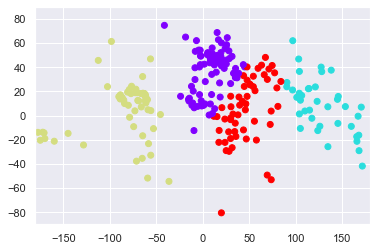

In [49]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [23]:
kmeans.inertia_

325235.52237055893

In [42]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    

In [43]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256595.2235602978,
 192212.4818949704,
 152164.15221066383,
 126758.35414179866,
 102873.2526445741,
 84945.19461239543,
 78221.05009710869]

Text(0, 0.5, 'wcss')

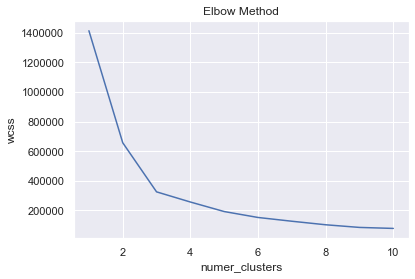

In [44]:
number_clusters=range(1,11)
plt.plot(number_clusters,wcss)
plt.title('Elbow Method')
plt.xlabel('numer_clusters')
plt.ylabel('wcss')